<a href="https://colab.research.google.com/github/DeboraOliver/StockMarket_Analysis/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python para finanças - CAPM (Capital Asset Pricing Model)

Descreve as relações entre o retorno esperado e o risco,comparando o portfolio com o mercado (IBOVESPA)

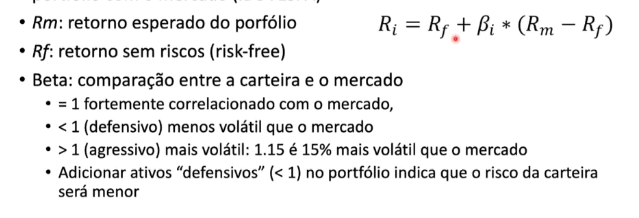

## Importação das bibliotecas e tratamento da base de dados

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.990000,15.20,11.846200,0.232812,35.732101,47.259998
1,2015-01-05,14.850000,15.00,11.926900,0.237187,34.634201,46.320000
2,2015-01-06,15.210000,14.80,11.750000,0.234062,32.468300,46.580002
3,2015-01-07,14.550000,14.67,11.615400,0.241875,32.238701,48.150002
4,2015-01-08,14.270000,14.15,11.811500,0.240000,32.987301,48.509998
...,...,...,...,...,...,...,...
1441,2020-10-27,18.600000,14.17,83.239998,25.450001,28.500000,95.800003
1442,2020-10-28,16.920000,12.77,79.139999,24.629999,27.500000,92.430000
1443,2020-10-29,16.610001,12.68,80.029999,25.360001,28.500000,92.910004
1444,2020-10-30,15.690000,12.28,75.830002,24.629999,27.000000,90.660004


In [ ]:
dataset.drop(labels = ['Date'], axis = 1, inplace = True)

In [ ]:

#normalizar dividindo ospreços pelo primeiro preço
dataset_normalizado = dataset.copy()
for i in dataset.columns:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_normalizado

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990660,0.986842,1.006812,1.018792,0.969274,0.980110
2,1.014676,0.973684,0.991879,1.005369,0.908659,0.985612
3,0.970647,0.965132,0.980517,1.038928,0.902234,1.018832
4,0.951968,0.930921,0.997071,1.030875,0.923184,1.026449
...,...,...,...,...,...,...
1441,1.240827,0.932237,7.026726,109.315673,0.797602,2.027084
1442,1.128753,0.840132,6.680623,105.793511,0.769616,1.955777
1443,1.108072,0.834211,6.755753,108.929095,0.797602,1.965933
1444,1.046698,0.807895,6.401209,105.793511,0.755623,1.918324


In [ ]:
#Taxas de retorno simples
dataset_taxa_retorno = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
dataset_taxa_retorno
#esses nan deveriam ser zeros

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477
...,...,...,...,...,...,...
1441,-0.018987,-0.018018,0.005921,-0.000785,0.008136,-0.010024
1442,-0.090323,-0.098800,-0.049255,-0.032220,-0.035088,-0.035177
1443,-0.018321,-0.007048,0.011246,0.029639,0.036364,0.005193
1444,-0.055388,-0.031546,-0.052480,-0.028786,-0.052632,-0.024217


In [ ]:
dataset_taxa_retorno.fillna(0, inplace=True) #preencher osnan  com zeros
dataset_taxa_retorno.head()

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.009340,-0.013158,0.006812,0.018792,-0.030726,-0.019890
2,0.024242,-0.013333,-0.014832,-0.013175,-0.062536,0.005613
3,-0.043392,-0.008784,-0.011455,0.033380,-0.007071,0.033705
4,-0.019244,-0.035447,0.016883,-0.007752,0.023221,0.007477


In [ ]:
dataset_taxa_retorno.mean() * 246 #media anual

GOL     0.332160
CVC     0.118679
WEGE    0.383254
MGLU    1.011730
TOTS    0.104269
BOVA    0.151235
dtype: float64

## Cálculo do parâmetro BETA para um ativo

### BETA com regressão linear

- Introdução a regressão linear: https://www.youtube.com/watch?v=ltRVgNsZBXE

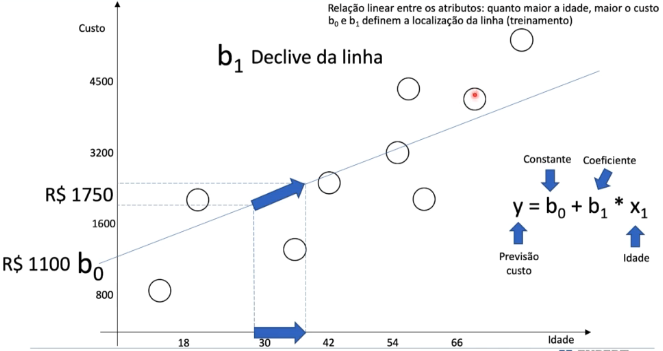

In [ ]:
figura = px.scatter(dataset_taxa_retorno, x = 'BOVA', y = 'MGLU', title = 'BOVA x MGLU')
figura.show()

In [ ]:
beta, alpha = np.polyfit(x = dataset_taxa_retorno['BOVA'], y = dataset_taxa_retorno['MGLU'], deg = 1)
print('beta:', beta, 'alpha:', alpha, 'alpha (%):', alpha * 100)
#deg = 1 para gerar uma linha reta
#o parametro beta representa a curva da linha, tbmé umamedida da volatilidade
#obeta tbm descreve a relação entre o retorno esperado e o risco
#se beta = 1.11 quer dizer  que aação é11% mais volatil que o mercado
#o alpha representa a taxa de retorno ANORMAL, assim de alpha= 0,34 que dizer que a ação excedeu o mercado em 0,34%
#o alpha tbm serve para analisar gestores de  carteira esempre queremos alphas maiores d  q zero

beta: 1.118179637527429 alpha: 0.0034252907778759356 alpha (%): 0.34252907778759356


In [ ]:
1.118179637527429 * 0.07041056 + 0.0034252907778759356

0.08215694523677923

In [ ]:
figura = px.scatter(dataset_taxa_retorno, x = 'BOVA', y = 'MGLU', title = 'BOVA x MGLU')
figura.add_scatter(x = dataset_taxa_retorno['BOVA'], y = beta * dataset_taxa_retorno['BOVA'] + alpha)
figura.show()

### BETA com covariância e variância

In [ ]:
matriz_covariancia = dataset_taxa_retorno.drop(columns = ['GOL', 'CVC', 'WEGE', 'TOTS']).cov() * 246 # anualizamos o resultado
# vamos fazer a matriz de covariancia, comparando apenas a magalu com a bova
matriz_covariancia

,MGLU,BOVA
MGLU,0.438249,0.082301
BOVA,0.082301,0.073603


In [ ]:
cov_mglu_bova = matriz_covariancia.iloc[1, 0]
cov_mglu_bova

0.08230097398370839

In [ ]:
variancia_bova = dataset_taxa_retorno['BOVA'].var() * 246
variancia_bova

0.07360264059690455

In [ ]:
beta_mglu = cov_mglu_bova / variancia_bova
beta_mglu
#acima de 14 indica que a acao da magulu é um perfil mais agressivo e por isso é mais volátil
# assima acao da magalu é 1,11 o que indica que ela é 11% mais volátil que o mercado

1.1181796375274293

## Cálculo CAPM para uma ação

In [ ]:
beta

1.118179637527429

In [ ]:
rm = dataset_taxa_retorno['BOVA'].mean() * 246
rm
#retorno médio anual

0.15123523377924633

In [ ]:
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0])
rf = taxa_selic_historico.mean() / 100
rf
#

0.08791666666666666

In [ ]:
#aplicados a formula do CAPM
capm_mglu = rf + (beta * (rm - rf))
capm_mglu
#quando investimos na magalu ganhamos 15% de retorno (CAPM = 0,15) para compensar pelo risco que está correndo

0.15871819908936718

## Cálculo do BETA para todas as ações

In [ ]:
betas = []
alphas = []
for ativo in dataset_taxa_retorno.columns[0:-1]:
  #print(ativo)
  beta, alpha = np.polyfit(dataset_taxa_retorno['BOVA'], dataset_taxa_retorno[ativo], 1)
  betas.append(beta)
  alphas.append(alpha)

In [ ]:
betas

[1.7619906958231593,
 1.1238231711157995,
 0.6915568417073887,
 1.118179637527429,
 0.7053530627240404]

In [ ]:
alphas

[0.00026701154086702586,
 -0.0002084674945157852,
 0.001132788934187814,
 0.0034252907778759356,
 -9.779312788267474e-06]

In [ ]:
def visualiza_betas_alphas(betas, alphas):
  for i, ativo in enumerate(dataset_taxa_retorno.columns[0:-1]):
    #print(i, ativo)
    print(ativo, 'beta:', betas[i], 'alpha:', alphas[i] * 100)

In [ ]:
visualiza_betas_alphas(betas, alphas)
#valores negativos de alpha indica um desempenho inferior a BOVA

GOL beta: 1.7619906958231593 alpha: 0.026701154086702587
CVC beta: 1.1238231711157995 alpha: -0.02084674945157852
WEGE beta: 0.6915568417073887 alpha: 0.11327889341878139
MGLU beta: 1.118179637527429 alpha: 0.34252907778759356
TOTS beta: 0.7053530627240404 alpha: -0.0009779312788267475


In [ ]:
np.array(alphas).mean() * 100

0.09213688891253448

## Cálculo CAPM para o portfólio

In [ ]:
rf

0.08791666666666666

In [ ]:
rm

0.15123523377924633

In [ ]:
capm_empresas = []
for i, ativo in enumerate(dataset_taxa_retorno.columns[0:-1]):
  #print(i, ativo)
  capm_empresas.append(rf + (betas[i] * (rm - rf)))

In [ ]:
capm_empresas

[0.19948339279188632,
 0.15907553954963452,
 0.13170505496047957,
 0.15871819908936718,
 0.13257861190682244]

In [ ]:
def visualiza_capm(capm):
  for i, ativo in enumerate(dataset_taxa_retorno.columns[0:-1]):
    print(ativo, 'CAPM:', capm[i] * 100)

In [ ]:
visualiza_capm(capm_empresas)

GOL CAPM: 19.94833927918863
CVC CAPM: 15.907553954963452
WEGE CAPM: 13.170505496047957
MGLU CAPM: 15.871819908936718
TOTS CAPM: 13.257861190682243


In [ ]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
capm_portfolio = np.sum(capm_empresas * pesos) * 100
capm_portfolio

15.631215965963802

## Exercício

In [ ]:
dataset = pd.read_csv('acoes_ex.csv')
dataset.drop(labels = ['Date'], axis = 1, inplace = True)
dataset_normalizado = dataset.copy()

for i in dataset.columns:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]

dataset_taxa_retorno = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
dataset_taxa_retorno.fillna(0, inplace=True)
dataset_taxa_retorno

,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.018102,0.026681,-0.019831,-0.081111,-0.020751,-0.019890
2,0.038144,-0.007276,-0.024818,-0.025393,0.013977,0.005613
3,0.014084,0.014660,0.034301,0.048387,0.044020,0.033705
4,-0.001208,-0.003096,0.040653,0.067456,0.003407,0.007477
...,...,...,...,...,...,...
1441,-0.033803,0.031688,-0.019174,-0.016832,-0.021493,-0.010024
1442,-0.025510,-0.073571,-0.020009,-0.061430,-0.050030,-0.035177
1443,-0.035901,-0.010023,-0.008449,0.037017,-0.005780,0.005193
1444,-0.055081,-0.017913,0.009941,-0.017072,-0.037468,-0.024217


In [ ]:
betas = []
alphas = []
for ativo in dataset_taxa_retorno.columns[0:-1]:
  beta, alpha = np.polyfit(dataset_taxa_retorno['BOVA'], dataset_taxa_retorno[ativo], 1)
  betas.append(beta)
  alphas.append(alpha)

In [ ]:
# O retorno do BBRASIL é 37% mais volátil que o mercado
# O retorno da PETROBRAS excedeu o mercado em 0.01%
# O retorno da AMBEV ficou abaixo do mercado em 0.03%
visualiza_betas_alphas(betas, alphas)

AMBEV beta: 0.5864193877010117 alpha: -0.03722995000184679
ODONTOPREV beta: 0.45451031039341405 alpha: 0.012062298116668934
VIVO beta: 0.5292082621316375 alpha: -0.003245075383463966
PETROBRAS beta: 1.5147437251435631 alpha: 0.019317115790244095
BBRASIL beta: 1.3750776847910828 alpha: -0.01952817708041144


In [ ]:
np.array(alphas).mean() * 100

-0.005724757711761832

In [ ]:
rm = dataset_taxa_retorno['BOVA'].mean() * 246
taxa_selic_historico = np.array([12.75, 14.25, 12.25, 6.5, 5.0, 2.0]).mean() / 100
rm, rf

(0.1509725090877086, 0.08791666666666666)

In [ ]:
capm_empresas = []
for i, ativo in enumerate(dataset_taxa_retorno.columns[0:-1]):
  capm_empresas.append(rf + (betas[i] * (rm - rf)))

In [ ]:
# Se investirmos na AMBEV, ganharemos 12.5% de retorno para ser compensado pelo risco que corremos
visualiza_capm(capm_empresas)

AMBEV CAPM: 12.489383517018554
ODONTOPREV CAPM: 11.657619717757264
VIVO CAPM: 12.128633945155265
PETROBRAS CAPM: 18.34301083075812
BBRASIL CAPM: 17.462334847554434


In [ ]:
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [ ]:
# Se investirmos no portfólio, ganharemos 14.4% de retorno para ser compensado pelo risco que corremos
capm_portfólio = np.sum(capm_empresas * pesos) * 100
capm_portfólio

14.41619657164873